In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
conda install -c conda-forge xgboost=3.0.2 lightgbm=4.6.0 missingno=0.5.2

Channels:
 - conda-forge
Platform: linux-64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [157]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
data_dir = os.path.join(os.getenv('HOME'), 'work/kaggle_kakr_housing/data')
# hint : os.getenvÎ•º ÏÇ¨Ïö©ÌïòÍ±∞ÎÇò ÏßÅÏ†ë Í≤ΩÎ°úÎ•º ÏûëÏÑ±

train_path = join(data_dir, 'train.csv')
test_path = join(data_dir, 'test.csv')

print(train_path)
print(test_path)

/home/jovyan/work/kaggle_kakr_housing/data/train.csv
/home/jovyan/work/kaggle_kakr_housing/data/test.csv


## 1. Îç∞Ïù¥ÌÑ∞ ÏÇ¥Ìé¥Î≥¥Í∏∞
pandasÏùò read_csv Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï¥ Îç∞Ïù¥ÌÑ∞Î•º ÏùΩÏñ¥Ïò§Í≥†, Í∞Å Î≥ÄÏàòÎì§Ïù¥ ÎÇòÌÉÄÎÇ¥Îäî ÏùòÎØ∏Î•º ÏÇ¥Ìé¥Î≥¥Í≤†ÏäµÎãàÎã§.
1. ID : ÏßëÏùÑ Íµ¨Î∂ÑÌïòÎäî Î≤àÌò∏
2. date : ÏßëÏùÑ Íµ¨Îß§Ìïú ÎÇ†Ïßú
3. price : ÌÉÄÍ≤ü Î≥ÄÏàòÏù∏ ÏßëÏùò Í∞ÄÍ≤©
4. bedrooms : Ïπ®Ïã§Ïùò Ïàò
5. bathrooms : Ïπ®Ïã§Îãπ ÌôîÏû•Ïã§ Í∞úÏàò
6. sqft_living : Ï£ºÍ±∞ Í≥µÍ∞ÑÏùò ÌèâÎ∞© ÌîºÌä∏
7. sqft_lot : Î∂ÄÏßÄÏùò ÌèâÎ∞© ÌîºÌä∏
8. floors : ÏßëÏùò Ï∏µ Ïàò
9. waterfront : ÏßëÏùò Ï†ÑÎ∞©Ïóê Í∞ïÏù¥ ÌùêÎ•¥ÎäîÏßÄ Ïú†Î¨¥ (a.k.a. Î¶¨Î≤ÑÎ∑∞)
10. view : ÏßëÏù¥ ÏñºÎßàÎÇò Ï¢ãÏïÑ Î≥¥Ïù¥ÎäîÏßÄÏùò Ï†ïÎèÑ
11. condition : ÏßëÏùò Ï†ÑÎ∞òÏ†ÅÏù∏ ÏÉÅÌÉú
12. grade : King County grading ÏãúÏä§ÌÖú Í∏∞Ï§ÄÏúºÎ°ú Îß§Í∏¥ ÏßëÏùò Îì±Í∏â
13. sqft_above : ÏßÄÌïòÏã§ÏùÑ Ï†úÏô∏Ìïú ÌèâÎ∞© ÌîºÌä∏
14. sqft_basement : ÏßÄÌïòÏã§Ïùò ÌèâÎ∞© ÌîºÌä∏
15. yr_built : ÏßëÏùÑ ÏßÄÏùÄ ÎÖÑÎèÑ
16. yr_renovated : ÏßëÏùÑ Ïû¨Í±¥Ï∂ïÌïú ÎÖÑÎèÑ
17. zipcode : Ïö∞Ìé∏Î≤àÌò∏
18. lat : ÏúÑÎèÑ
19. long : Í≤ΩÎèÑ
20. sqft_living15 : 2015ÎÖÑ Í∏∞Ï§Ä Ï£ºÍ±∞ Í≥µÍ∞ÑÏùò ÌèâÎ∞© ÌîºÌä∏(ÏßëÏùÑ Ïû¨Í±¥Ï∂ïÌñàÎã§Î©¥, Î≥ÄÌôîÍ∞Ä ÏûàÏùÑ Ïàò ÏûàÏùå)
21. sqft_lot15 : 2015ÎÖÑ Í∏∞Ï§Ä Î∂ÄÏßÄÏùò ÌèâÎ∞© ÌîºÌä∏(ÏßëÏùÑ Ïû¨Í±¥Ï∂ïÌñàÎã§Î©¥, Î≥ÄÌôîÍ∞Ä ÏûàÏùÑ Ïàò ÏûàÏùå)

In [159]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
print('train data dim : {}'.format(train.shape))
print('test data dim : {}'.format(test.shape))

train data dim : (15035, 21)
test data dim : (6468, 20)


In [160]:
y = train['price']
# train.drop(columns=['price'], inplace=True)

In [161]:
train_len = len(train)
data = pd.concat([train, test], axis=0)

In [162]:
data.head()

id             date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0   0  20141013T000000  221900.0         3       1.00         1180      5650   
1   1  20150225T000000  180000.0         2       1.00          770     10000   
2   2  20150218T000000  510000.0         3       2.00         1680      8080   
3   3  20140627T000000  257500.0         3       2.25         1715      6819   
4   4  20150115T000000  291850.0         3       1.50         1060      9711   

   floors  waterfront  view  ...  grade  sqft_above  sqft_basement  yr_built  \
0     1.0           0     0  ...      7        1180              0      1955   
1     1.0           0     0  ...      6         770              0      1933   
2     1.0           0     0  ...      8        1680              0      1987   
3     2.0           0     0  ...      7        1715              0      1995   
4     1.0           0     0  ...      7        1060              0      1963   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1             0    98028  47.7379 -122.233           2720        8062  
2             0    98074  47.6168 -122.045           1800        7503  
3             0    98003  47.3097 -122.327           2238        6819  
4             0    98198  47.4095 -122.315           1650        9711  

[5 rows x 21 columns]

## 2. Í∞ÑÎã®Ìïú Ï†ÑÏ≤òÎ¶¨ 
Í∞Å Î≥ÄÏàòÎì§Ïóê ÎåÄÌï¥ Í≤∞Ï∏° Ïú†Î¨¥Î•º ÌôïÏù∏ÌïòÍ≥†, Î∂ÑÌè¨Î•º ÌôïÏù∏Ìï¥Î≥¥Î©¥ÏÑú Í∞ÑÎã®ÌïòÍ≤å Ï†ÑÏ≤òÎ¶¨Î•º ÌïòÍ≤†ÏäµÎãàÎã§.
### Í≤∞Ï∏°Ïπò ÌôïÏù∏
Î®ºÏ†Ä Îç∞Ïù¥ÌÑ∞Ïóê Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäîÏßÄÎ•º ÌôïÏù∏ÌïòÍ≤†ÏäµÎãàÎã§.<br>
missingno ÎùºÏù¥Î∏åÎü¨Î¶¨Ïùò matrix Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÎ©¥, Îç∞Ïù¥ÌÑ∞Ïùò Í≤∞Ï∏° ÏÉÅÌÉúÎ•º ÏãúÍ∞ÅÌôîÎ•º ÌÜµÌï¥ ÏÇ¥Ìé¥Î≥º Ïàò ÏûàÏäµÎãàÎã§.

In [163]:
msno.matrix(data)

<Axes: >

Î™®Îì† Î≥ÄÏàòÏóê Í≤∞Ï∏°ÏπòÍ∞Ä ÏóÜÎäî Í≤ÉÏúºÎ°ú Î≥¥Ïù¥ÏßÄÎßå, ÌòπÏãú Î™®Î•¥Îãà ÌôïÏã§ÌïòÍ≤å ÏÇ¥Ìé¥Î≥¥Í≤†ÏäµÎãàÎã§.<br>

In [164]:
for c in data.columns:
    print('{} : {}'.format(c, len(data.loc[pd.isnull(data[c]), c].values)))

id : 0
date : 0
price : 6468
bedrooms : 0
bathrooms : 0
sqft_living : 0
sqft_lot : 0
floors : 0
waterfront : 0
view : 0
condition : 0
grade : 0
sqft_above : 0
sqft_basement : 0
yr_built : 0
yr_renovated : 0
zipcode : 0
lat : 0
long : 0
sqft_living15 : 0
sqft_lot15 : 0


In [165]:
# 1. id Ïª¨ÎüºÏù¥ Í≤∞Ï∏°ÏπòÏù∏ÏßÄ ÌôïÏù∏Ìï©ÎãàÎã§.
null_check = pd.isnull(data['id'])
print(null_check)

# 2. Í≤∞Ï∏°ÏπòÏù∏ Îç∞Ïù¥ÌÑ∞Îßå ÎΩëÏïÑÎÉÖÎãàÎã§.
null_data = data.loc[null_check, 'id']
null_data.head()

# 3. Í≤∞Ï∏°ÏπòÏù∏ Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÏàòÎ•º ÏÖâÎãàÎã§.
print(f'id: {len(null_data.values)}')

# Ìïú Î≤àÏóê ÎøÖ!
# Ï∂îÍ∞Ä : ÏúÑÏóê Ïã§ÌñâÌñàÎçò ÏΩîÎìúÎäî f-stringÏúºÎ°ú ÏûëÎèôÌïòÏßÄÎßå Ìï¥Îãπ ÏΩîÎìúÎäî ÎåÄÍ¥ÑÌò∏Í∞Ä 2Í∞úÍ∞Ä ÏûàÏñ¥ f-stringÏúºÎ°ú ÌëúÌòÑÌïòÎ©¥ ÏóêÎü¨Í∞Ä Î∞úÏÉùÌï©ÎãàÎã§. Ïù¥Îü¥ Í≤ΩÏö∞ formatÏúºÎ°ú Ïã§ÌñâÌï©ÎãàÎã§.
# Ï∂îÍ∞ÄÏóê ÎåÄÌïú ÎÇ¥Ïö© : https://blockdmask.tistory.com/429
print('{} : {}'.format('id', len(data.loc[pd.isnull(data['id']), 'id'].values)))

for c in data.columns:
    print('{} : {}'.format(c, len(data.loc[pd.isnull(data[c]), c].values)))

0       False
1       False
2       False
3       False
4       False
        ...  
6463    False
6464    False
6465    False
6466    False
6467    False
Name: id, Length: 21503, dtype: bool
id: 0
id : 0
id : 0
date : 0
price : 6468
bedrooms : 0
bathrooms : 0
sqft_living : 0
sqft_lot : 0
floors : 0
waterfront : 0
view : 0
condition : 0
grade : 0
sqft_above : 0
sqft_basement : 0
yr_built : 0
yr_renovated : 0
zipcode : 0
lat : 0
long : 0
sqft_living15 : 0
sqft_lot15 : 0


### id, date Î≥ÄÏàò Ï†ïÎ¶¨
id Î≥ÄÏàòÎäî Î™®Îç∏Ïù¥ ÏßëÍ∞íÏùÑ ÏòàÏ∏°ÌïòÎäîÎç∞ ÎèÑÏõÄÏùÑ Ï£ºÏßÄ ÏïäÏúºÎØÄÎ°ú Ï†úÍ±∞Ìï©ÎãàÎã§.<br>
date Î≥ÄÏàòÎäî Ïó∞ÏõîÏùºÏãúÍ∞ÑÏúºÎ°ú Í∞íÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÎäîÎç∞, Ïó∞ÏõîÎßå Í≥†Î†§ÌïòÎäî Î≤îÏ£ºÌòï Î≥ÄÏàòÎ°ú ÎßåÎì§Í≤†ÏäµÎãàÎã§.

In [166]:
# üßº Ï†ÑÏ≤òÎ¶¨
sub_id = data['id'][train_len:]
data.drop(columns=['id'], inplace=True)
data['date'] = data['date'].apply(lambda i: i[:6]).astype(int)

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21503 entries, 0 to 6467
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21503 non-null  int64  
 1   price          15035 non-null  float64
 2   bedrooms       21503 non-null  int64  
 3   bathrooms      21503 non-null  float64
 4   sqft_living    21503 non-null  int64  
 5   sqft_lot       21503 non-null  int64  
 6   floors         21503 non-null  float64
 7   waterfront     21503 non-null  int64  
 8   view           21503 non-null  int64  
 9   condition      21503 non-null  int64  
 10  grade          21503 non-null  int64  
 11  sqft_above     21503 non-null  int64  
 12  sqft_basement  21503 non-null  int64  
 13  yr_built       21503 non-null  int64  
 14  yr_renovated   21503 non-null  int64  
 15  zipcode        21503 non-null  int64  
 16  lat            21503 non-null  float64
 17  long           21503 non-null  float64
 18  sqft_living1

In [168]:
# Feature Engineering

In [169]:
# ‚úÖ Ï†ÑÏ≤òÎ¶¨ ÏãúÏûë
from math import radians, cos, sin, asin, sqrt, atan2, degrees
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
import pandas as pd

# üßÆ Í∏∞Î≥∏ ÌååÏÉù Î≥ÄÏàò
data['house_age'] = 2025 - data['yr_built']
data.drop(columns=['yr_built'], inplace=True)

data['grade_area'] = data['grade'] * data['sqft_living']
data['renovated_flag'] = (data['yr_renovated'] > 0).astype(int)
data['renovated_age'] = data['yr_renovated'].apply(lambda x: 2025 - x if x > 0 else 0)
data['total_rooms'] = data['bedrooms'] + data['bathrooms']
data['room_density'] = data['sqft_living'] / (data['total_rooms'] + 1)
data['house_volume'] = data['sqft_living'] * data['floors']
data['living_ratio'] = data['sqft_living'] / (data['sqft_lot'] + 1)
data['basement_ratio'] = data['sqft_basement'] / (data['sqft_living'] + 1)
data['bath_per_bed'] = data['bathrooms'] / (data['bedrooms'] + 1)
data['lat_long'] = data['lat'] * data['long']
data['luxury_score'] = data['grade'] * data['sqft_living'] * (data['view'] + 1)

# üóìÔ∏è ÎÇ†Ïßú ‚Üí Ïó∞ÎèÑ / Ïõî
data['year'] = data['date'] // 100
data['month'] = data['date'] % 100

# üìÆ Ïö∞Ìé∏Î≤àÌò∏ Ï†ÑÏ≤òÎ¶¨
data['zipcode3'] = data['zipcode'] // 100
data.drop(columns=['zipcode'], inplace=True)

# üìç ÏãúÏï†ÌãÄ Ï§ëÏã¨Ï†ê Í∏∞Ï§Ä Í±∞Î¶¨ Î∞è Î∞©Ìñ• Í≥ÑÏÇ∞
center_lat, center_long = 47.5112, -122.257

def haversine(lat1, lon1, lat2, lon2):
    R = 6371
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    return 2 * R * asin(sqrt(a))

def bearing(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlon = lon2 - lon1
    x = sin(dlon) * cos(lat2)
    y = cos(lat1)*sin(lat2) - sin(lat1)*cos(lat2)*cos(dlon)
    return (degrees(atan2(x, y)) + 360) % 360

data['distance_center'] = data.apply(lambda row: haversine(row['lat'], row['long'], center_lat, center_long), axis=1)
data['bearing_center'] = data.apply(lambda row: bearing(row['lat'], row['long'], center_lat, center_long), axis=1)

# üìä KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
data['kmeans_cluster'] = kmeans.fit_predict(data[['lat', 'long']])

# üßë‚Äçü§ù‚Äçüßë Í∞ÄÍπåÏö¥ 5Í∞ú Ïßë Í±∞Î¶¨ ÌèâÍ∑†
train_features = data.iloc[:train_len][['lat', 'long']]
nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(train_features)
distances, indices = nbrs.kneighbors(data[['lat', 'long']])
data['neighbor_distance_5'] = distances.mean(axis=1)

# üî™ ÏßÄÏó≠ Íµ¨Í∞ÑÌôî
data['lat_bin'] = pd.qcut(data['lat'], q=10, labels=False)
data['long_bin'] = pd.qcut(data['long'], q=10, labels=False)

print("‚úÖ Feature engineering ÏôÑÎ£å")


‚úÖ Feature engineering ÏôÑÎ£å


In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21503 entries, 0 to 6467
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 21503 non-null  int64  
 1   price                15035 non-null  float64
 2   bedrooms             21503 non-null  int64  
 3   bathrooms            21503 non-null  float64
 4   sqft_living          21503 non-null  int64  
 5   sqft_lot             21503 non-null  int64  
 6   floors               21503 non-null  float64
 7   waterfront           21503 non-null  int64  
 8   view                 21503 non-null  int64  
 9   condition            21503 non-null  int64  
 10  grade                21503 non-null  int64  
 11  sqft_above           21503 non-null  int64  
 12  sqft_basement        21503 non-null  int64  
 13  yr_renovated         21503 non-null  int64  
 14  lat                  21503 non-null  float64
 15  long                 21503 non-null  float

### Í∞Å Î≥ÄÏàòÎì§Ïùò Î∂ÑÌè¨ ÌôïÏù∏
ÌïúÏ™ΩÏúºÎ°ú ÏπòÏö∞Ïπú Î∂ÑÌè¨Îäî Î™®Îç∏Ïù¥ Í≤∞Í≥ºÎ•º ÏòàÏ∏°ÌïòÍ∏∞Ïóê Ï¢ãÏßÄ ÏïäÏùÄ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎØÄÎ°ú Îã§Îì¨Ïñ¥Ï§Ñ ÌïÑÏöîÍ∞Ä ÏûàÏäµÎãàÎã§.

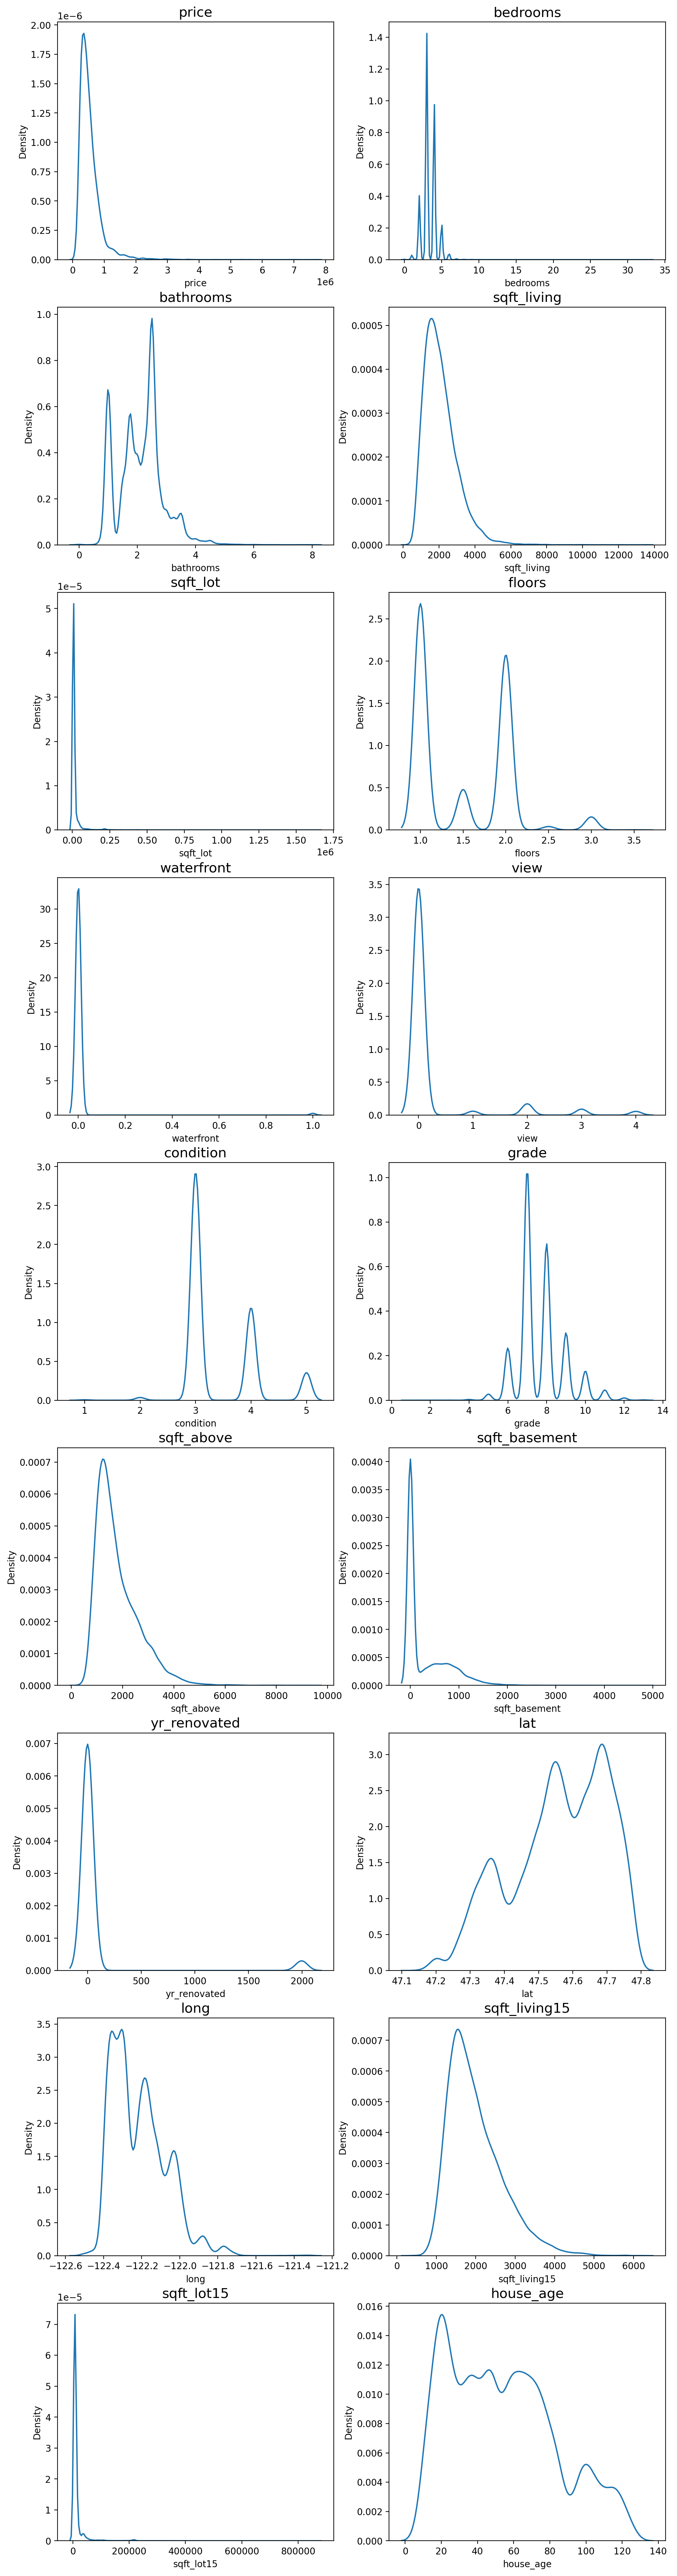

In [135]:
fig, ax = plt.subplots(9, 2, figsize=(12, 50))   # Í∞ÄÎ°úÏä§ÌÅ¨Î°§ ÎïåÎ¨∏Ïóê Í∑∏ÎûòÌîÑ ÌôïÏù∏Ïù¥ Î∂àÌé∏ÌïòÎã§Î©¥ figsizeÏùò xÍ∞íÏùÑ Ï°∞Ï†àÌï¥ Î≥¥ÏÑ∏Ïöî.

# id Î≥ÄÏàò(count==0Ïù∏ Í≤ΩÏö∞)Îäî Ï†úÏô∏ÌïòÍ≥† Î∂ÑÌè¨Î•º ÌôïÏù∏Ìï©ÎãàÎã§.
count = 1
columns = data.columns
for row in range(9):
    for col in range(2):
        sns.kdeplot(data=data[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 19 :
            break

price, bedrooms, sqft_living, sqft_lot, sqft_above, sqft_basement Î≥ÄÏàòÍ∞Ä ÌïúÏ™ΩÏúºÎ°ú ÏπòÏö∞Ïπú Í≤ΩÌñ•ÏùÑ Î≥¥ÏòÄÏäµÎãàÎã§.<br>
log-scalingÏùÑ ÌÜµÌï¥ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨Î•º Ï†ïÍ∑úÎ∂ÑÌè¨Ïóê Í∞ÄÍπùÍ≤å ÎßåÎì§Ïñ¥ Î≥¥Í≤†ÏäµÎãàÎã§.

In [171]:
# Î°úÍ∑∏ Î≥ÄÌôò (ÏôúÎèÑ Î≥¥Ï†ï)
skew_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']
for c in skew_columns:
    data[c] = np.log1p(data[c].values)

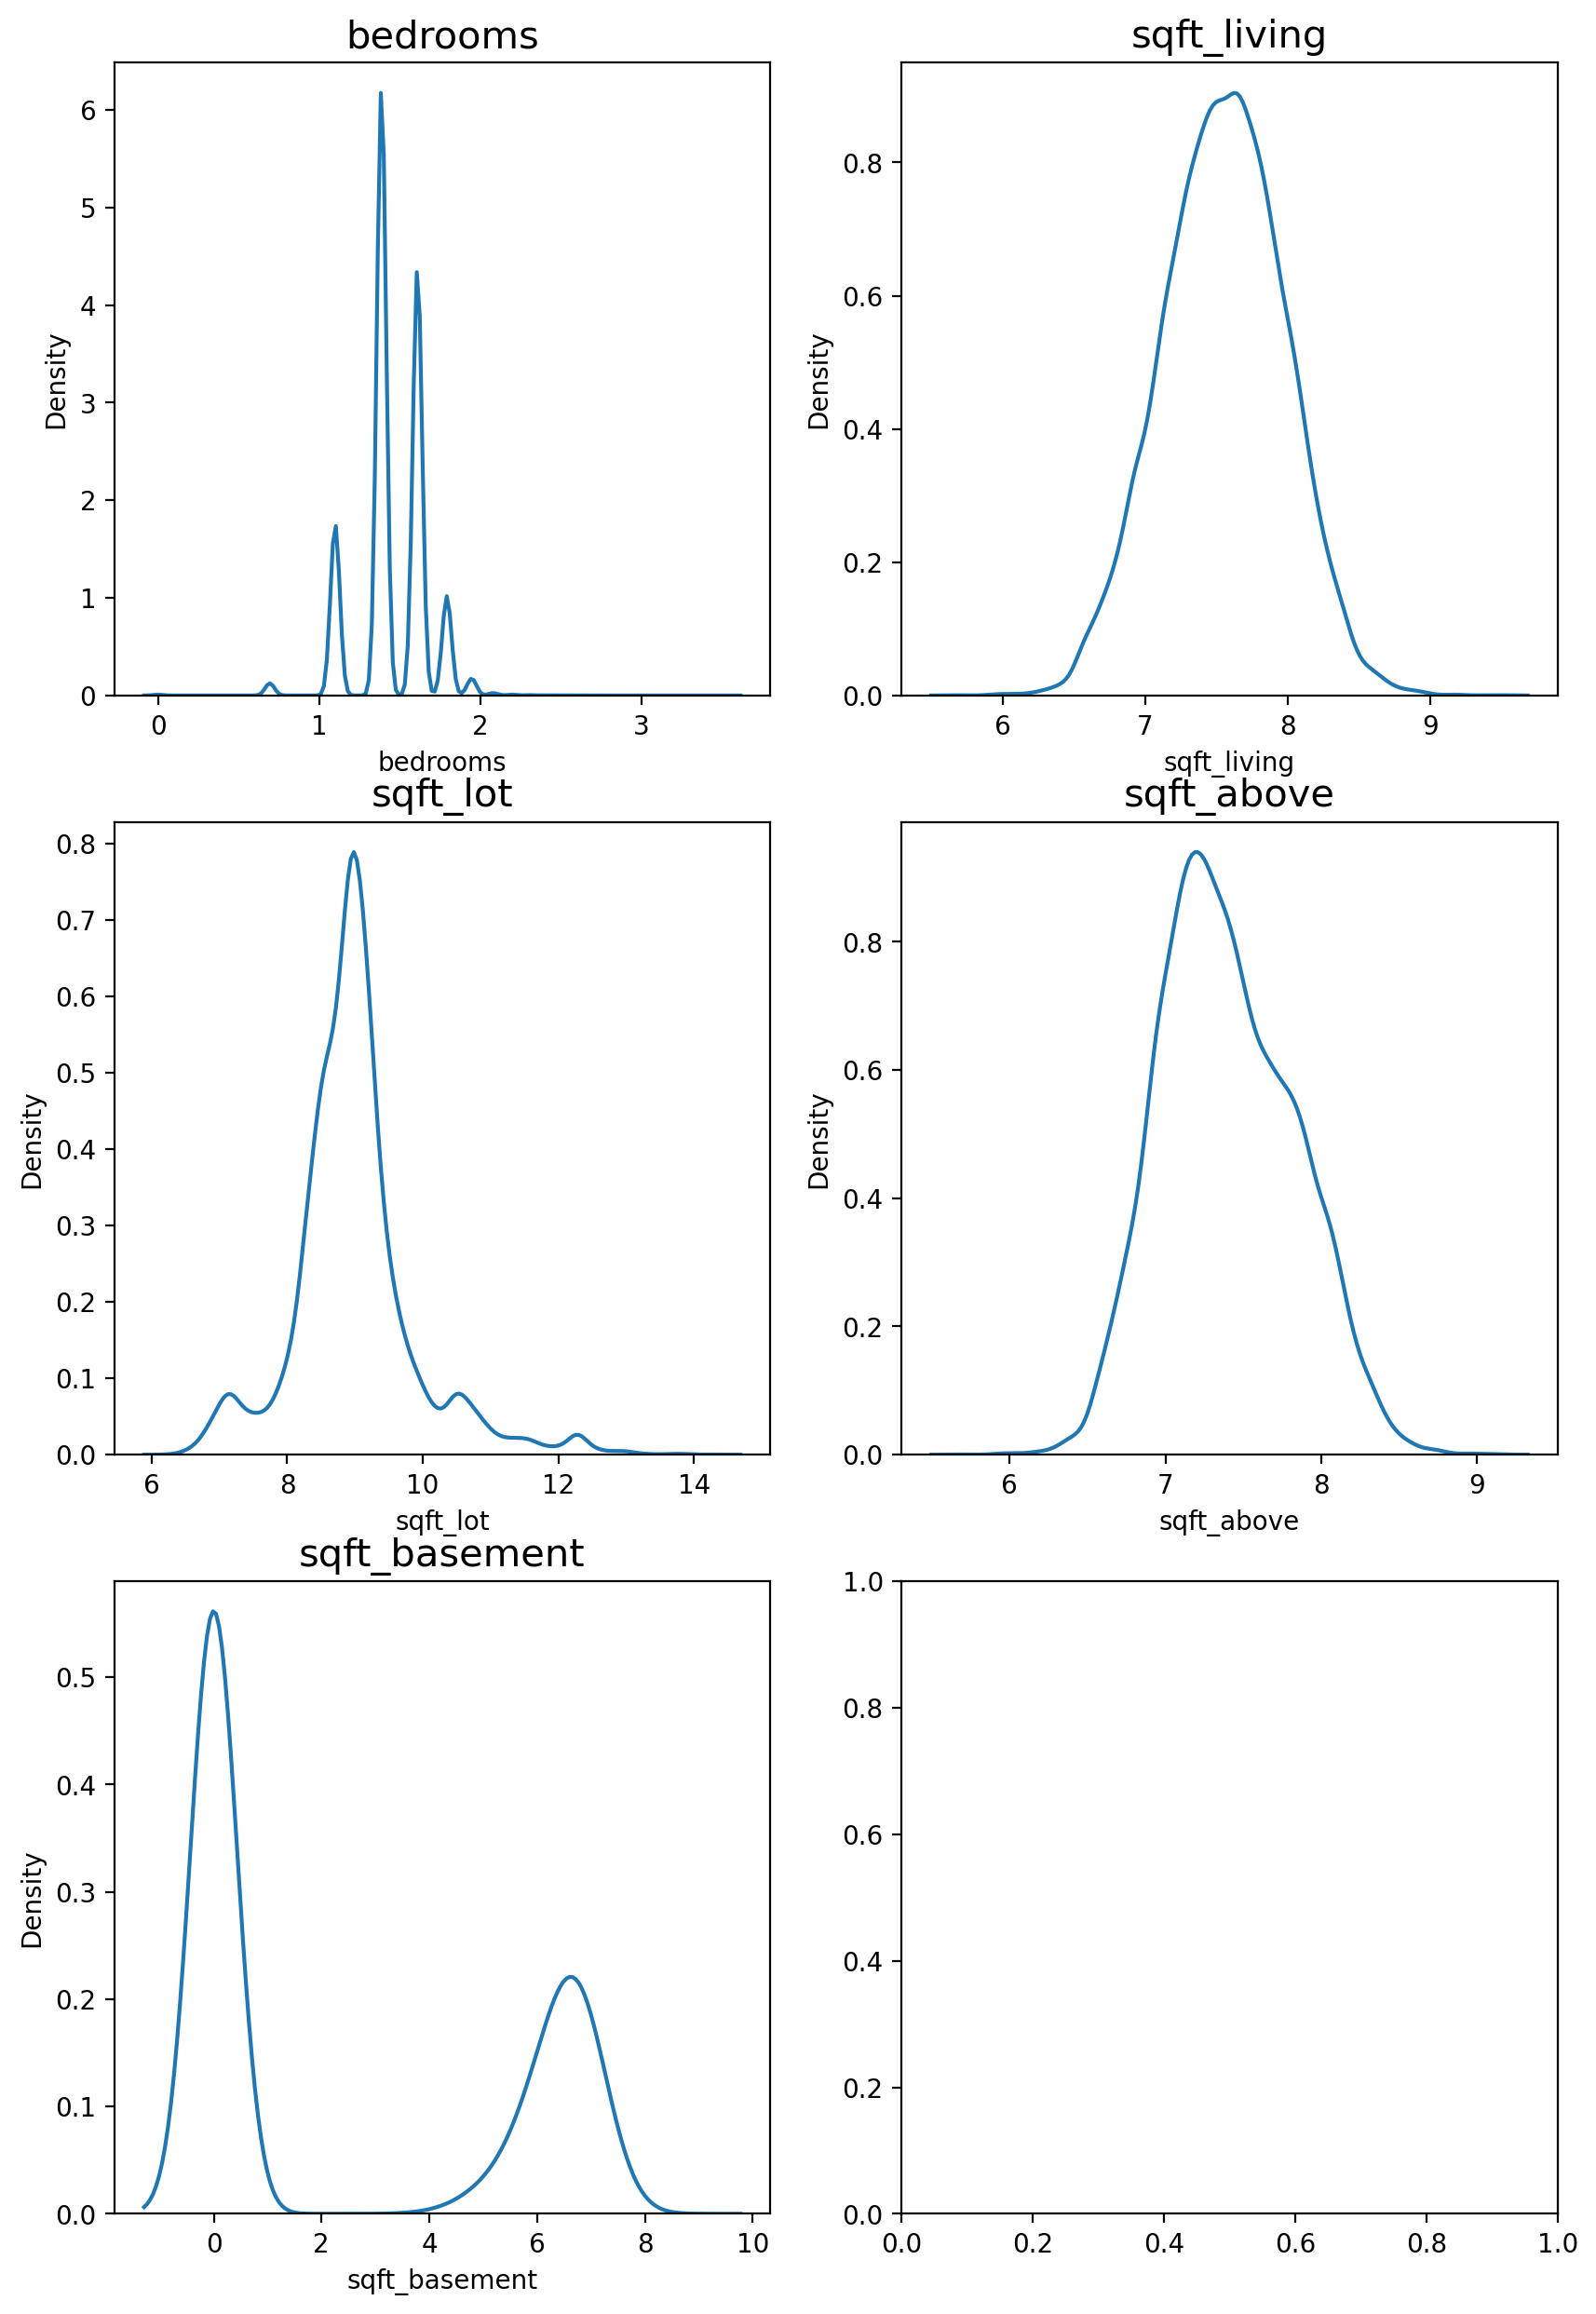

In [61]:
fig, ax = plt.subplots(3, 2, figsize=(10, 15))

count = 0
for row in range(3):
    for col in range(2):
        if count == 5:
            break
        sns.kdeplot(data[skew_columns[count]], ax=ax[row][col])
        ax[row][col].set_title(skew_columns[count], fontsize=15)
        count+=1

Ïñ¥ÎäêÏ†ïÎèÑ ÏπòÏö∞Ïπ®Ïù¥ Ï§ÑÏñ¥Îì† Î∂ÑÌè¨Î•º ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

In [20]:
xx = np.linspace(0, 10, 500)
yy = np.log(xx)

plt.hlines(0, 0, 10)
plt.vlines(0, -5, 5)
plt.plot(xx, yy, c='r')
plt.show()

In [21]:
sns.kdeplot(y)
plt.show()

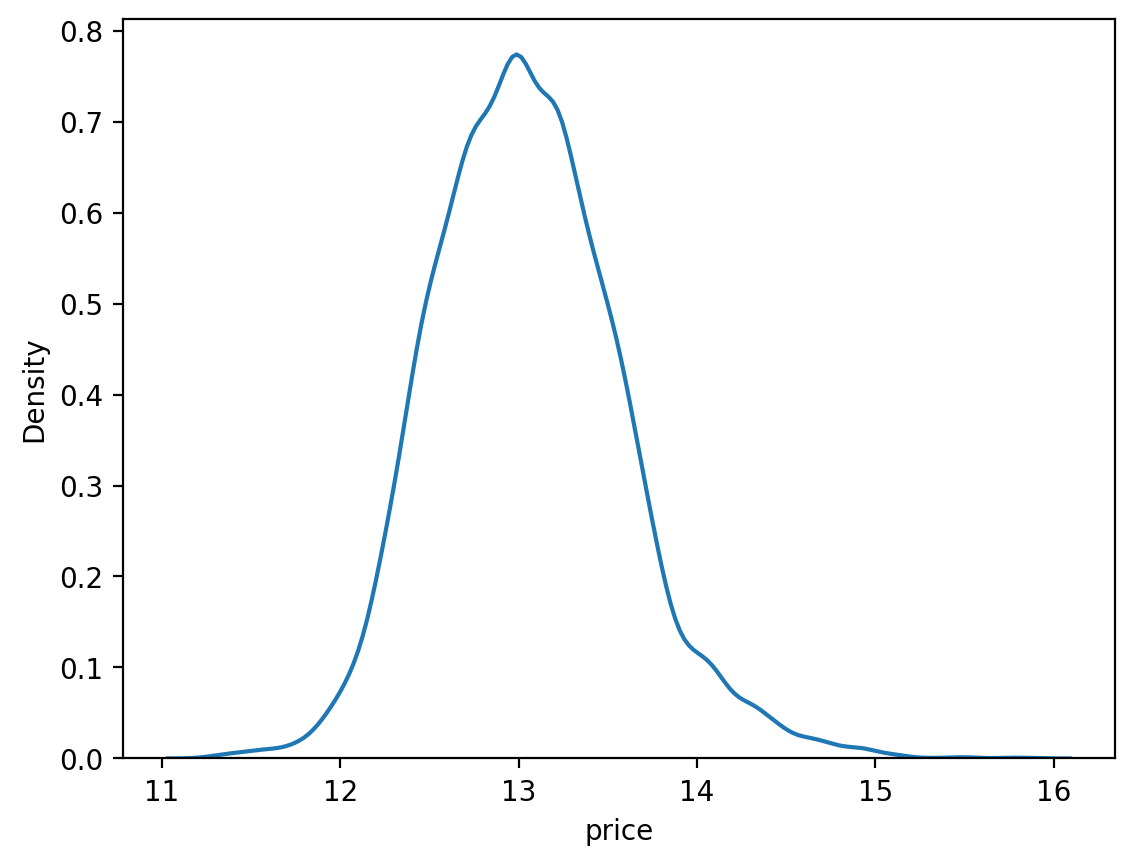

In [22]:
y_log_transformation = np.log1p(y)

sns.kdeplot(y_log_transformation)
plt.show()

In [107]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA

# # üîç ID, price, date Îì± Ï†úÏô∏Ìïú ÌîºÏ≤òÎßå ÏÇ¨Ïö©
# exclude_cols = ['id', 'price', 'date']  # ÌïÑÏöî Ïãú Ï∂îÍ∞Ä
# feature_cols = [col for col in data.columns if col not in exclude_cols]

# # ‚öñÔ∏è Ïä§ÏºÄÏùºÎßÅ
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(data[feature_cols])

# # üß† PCA Ï†ÅÏö© (Ïòà: Î∂ÑÏÇ∞ 90% Î≥¥Ï°¥)
# pca = PCA(n_components=0.90, random_state=42)
# X_pca = pca.fit_transform(X_scaled)

# # üîÅ train/test Ïû¨Î∂ÑÎ¶¨
# x = X_pca[:train_len]
# sub_x = X_pca[train_len:]

# print(f"PCA Ïù¥ÌõÑ feature Ïàò: {x.shape[1]}")

PCA Ïù¥ÌõÑ feature Ïàò: 14


In [172]:
# ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞
corr_matrix = data.corr()

# ÌÉÄÍ≤ü Î≥ÄÏàòÏôÄÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎßå Ï∂îÏ∂ú
target_corr = corr_matrix['price'].drop('price')  # Î≥∏Ïù∏ Ï†úÏô∏

# Í∏∞Ï§Ä ÏÑ§Ï†ï: Ï†àÎåìÍ∞í Í∏∞Ï§Ä ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä 0.01 Ïù¥ÌïòÏù∏ Ïª¨Îüº Ï†úÍ±∞
low_corr_features = target_corr[abs(target_corr) < 0.01].index.tolist()
print("üîç Ï†úÍ±∞Ìï† Ïª¨Îüº:", low_corr_features)

# Ï†úÍ±∞
data.drop(columns=low_corr_features, inplace=True)

üîç Ï†úÍ±∞Ìï† Ïª¨Îüº: ['date', 'year']


In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21503 entries, 0 to 6467
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                15035 non-null  float64
 1   bedrooms             21503 non-null  float64
 2   bathrooms            21503 non-null  float64
 3   sqft_living          21503 non-null  float64
 4   sqft_lot             21503 non-null  float64
 5   floors               21503 non-null  float64
 6   waterfront           21503 non-null  int64  
 7   view                 21503 non-null  int64  
 8   condition            21503 non-null  int64  
 9   grade                21503 non-null  int64  
 10  sqft_above           21503 non-null  float64
 11  sqft_basement        21503 non-null  float64
 12  yr_renovated         21503 non-null  int64  
 13  lat                  21503 non-null  float64
 14  long                 21503 non-null  float64
 15  sqft_living15        21503 non-null  int64

In [174]:
# üîÅ train/test Ïû¨Î∂ÑÎ¶¨
data.drop(columns=['price'], inplace=True)
x = data.iloc[:train_len, :]
sub_x = data.iloc[train_len:, :]

## 3. Î™®Îç∏ÎßÅ
### Average Blending
Ïó¨Îü¨Í∞ÄÏßÄ Î™®Îç∏Ïùò Í≤∞Í≥ºÎ•º ÏÇ∞Ïà† ÌèâÍ∑†ÏùÑ ÌÜµÌï¥ Blending Î™®Îç∏ÏùÑ ÎßåÎì§Í≤†ÏäµÎãàÎã§.

In [176]:
gboost = GradientBoostingRegressor(random_state=2019)
xgboost = xgb.XGBRegressor(random_state=2019)
lightgbm = lgb.LGBMRegressor(random_state=2019)

models = [{'model':gboost, 'name':'GradientBoosting'}, {'model':xgboost, 'name':'XGBoost'},
          {'model':lightgbm, 'name':'LightGBM'}]

### Cross Validation
ÍµêÏ∞® Í≤ÄÏ¶ùÏùÑ ÌÜµÌï¥ Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ Í∞ÑÎã®Ìûà ÌèâÍ∞ÄÌïòÍ≤†ÏäµÎãàÎã§.

In [140]:
def get_cv_score(models):
    kfold = KFold(n_splits=5).get_n_splits(x.values)
    for m in models:
        CV_score = np.mean(cross_val_score(m['model'], X=x.values, y=y, cv=kfold))
        print(f"Model: {m['name']}, CV score:{CV_score:.4f}")
print('Ïñçüí¢')

Ïñçüí¢


In [141]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.5.2

Found existing installation: scikit-learn 1.5.2
Uninstalling scikit-learn-1.5.2:
  Successfully uninstalled scikit-learn-1.5.2
  Using cached scikit_learn-1.5.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.9 MB)


In [26]:
get_cv_score(models)

Model: GradientBoosting, CV score:0.8583
Model: XGBoost, CV score:0.8701
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000850 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2551
[LightGBM] [Info] Number of data points in the train set: 12028, number of used features: 20
[LightGBM] [Info] Start training from score 540497.991270
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000989 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2582
[LightGBM] [Info] Number of data points in the train set: 12028, number of used features: 20
[LightGBM] [Info] Start training from score 542956.681826
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000906 seconds.
Y

### Make Submission

ÌöåÍ∑Ä Î™®Îç∏Ïùò Í≤ΩÏö∞ÏóêÎäî cross_val_score Ìï®ÏàòÍ∞Ä R<sup>2</sup>Î•º Î∞òÌôòÌï©ÎãàÎã§.<br>
R<sup>2</sup> Í∞íÏù¥ 1Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù Î™®Îç∏Ïù¥ Îç∞Ïù¥ÌÑ∞Î•º Ïûò ÌëúÌòÑÌï®ÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§. 3Í∞ú Ìä∏Î¶¨ Î™®Îç∏Ïù¥ ÏÉÅÎãπÌûà ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ Í¥úÏ∞ÆÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥Ïó¨Ï£ºÍ≥† ÏûàÏäµÎãàÎã§.<br> ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú 3Í∞ú Î™®Îç∏ÏùÑ ÌïôÏäµÏãúÌÇ§Í≥†, Average BlendingÏùÑ ÌÜµÌï¥ Ï†úÏ∂ú Í≤∞Í≥ºÎ•º ÎßåÎì§Í≤†ÏäµÎãàÎã§.

In [177]:
def AveragingBlending(models, x, y, sub_x):
    for m in models : 
        m['model'].fit(x.values, y)
    
    predictions = np.column_stack([
        m['model'].predict(sub_x.values) for m in models
    ])
    return np.mean(predictions, axis=1)

In [27]:
# from sklearn.ensemble import StackingRegressor
# from sklearn.linear_model import Ridge

# stack_model = StackingRegressor(
#     estimators=[
#         ('gb', gboost),
#         ('xgb', xgboost),
#         ('lgb', lightgbm)
#     ],
#     final_estimator=Ridge()
# )
# stack_model.fit(x, y)
# y_pred = stack_model.predict(sub_x)

In [143]:
from sklearn.model_selection import GridSearchCV

# Í≥µÌÜµ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌÉêÏÉâ Ìï®Ïàò
def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    grid_model = GridSearchCV(model, param_grid=param_grid, 
                              scoring='neg_mean_squared_error',
                              cv=5, verbose=verbose, n_jobs=n_jobs)
    grid_model.fit(train, y)
    
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']
    
    results = pd.DataFrame(params)
    results['score'] = score
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')
    
    print(f"Best RMSLE: {results.iloc[0]['RMSLE']:.4f}")
    return grid_model.best_estimator_, results


In [178]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
import pandas as pd
import numpy as np

# ÌååÎùºÎØ∏ÌÑ∞Í∞Ä ÎßéÏùÄ Í≤ΩÏö∞ ÎûúÎç§ÌïòÍ≤å search Î•º ÏßÑÌñâÌï† Ïàò ÏûàÎã§
def my_RandomSearch(model, train, y, param_distributions, n_iter=30, cv=5, verbose=2, n_jobs=-1, random_state=42):
    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_distributions,
        n_iter=n_iter,
        scoring='neg_mean_squared_error',
        cv=cv,
        verbose=verbose,
        n_jobs=n_jobs,
        random_state=random_state
    )
    search.fit(train, y)

    params = search.cv_results_['params']
    score = search.cv_results_['mean_test_score']

    results = pd.DataFrame(params)
    results['score'] = score
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')

    print(f"Best RMSLE: {results.iloc[0]['RMSLE']:.4f}")
    return search.best_estimator_, results


In [179]:
# # üéõ ÌååÎùºÎØ∏ÌÑ∞ Í∑∏Î¶¨Îìú
# param_grids = {
#     'GradientBoosting': {'n_estimators': [100, 256], 'max_depth': [5, 9], 'learning_rate': [0.025], 'subsample': [0.7]},
#     'XGBoost': {'n_estimators': [121, 200], 'max_depth': [5, 9], 'learning_rate': [0.06], 'subsample': [0.72]},
#     'LightGBM': {'n_estimators': [200, 346], 'max_depth': [5, 9], 'learning_rate': [0.04], 'subsample': [0.85]}
# }
param_dists = {
    'GradientBoosting': {
        'n_estimators': [100, 256],
        'max_depth': [5, 9],
        'learning_rate': [0.025],
        'subsample': [0.7],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 3],
        'max_features': ['sqrt']
    },
    'XGBoost': {
        'n_estimators': [121, 200],
        'max_depth': [5, 9],
        'learning_rate': [0.06],
        'subsample': [0.72],
        'colsample_bytree': [0.7, 0.9],
        'gamma': [0, 0.1],
        'reg_alpha': [0, 0.01],
        'reg_lambda': [1, 2]
    },
    'LightGBM': {
        'n_estimators': [200, 346],
        'max_depth': [5, 9],
        'learning_rate': [0.04],
        'subsample': [0.85],
        'num_leaves': [31, 50],
        'colsample_bytree': [0.7, 0.9],
        'reg_alpha': [0.0, 0.01],
        'reg_lambda': [0.0, 1.0]
    }
}

In [ ]:
# üß† ÌäúÎãù Ïã§Ìñâ (RandomizedSearchCV ÏÇ¨Ïö©)
best_models = []

for m in models:
    name = m['name']
    print(f"\nüîç Randomized Tuning {name}...")
    
    param_dist = param_dists[name]  # param_distsÎäî Î™®Îç∏Î≥Ñ Î∂ÑÌè¨Ìòï ÌååÎùºÎØ∏ÌÑ∞ ÎîïÏÖîÎÑàÎ¶¨
    best_model, _ = my_RandomSearch(
        m['model'], x, y,
        param_distributions=param_dist,
        n_iter=20,  # ÏãúÎèÑÌï† Ï°∞Ìï© Ïàò
        cv=5,
        verbose=1,
        n_jobs=-1
    )
    
    best_models.append({'model': best_model, 'name': name})


üîç Randomized Tuning GradientBoosting...
Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [147]:
# # GridSearch Î°ú ÌäúÎãù Ïã§Ìñâ
# best_models = []
# for m in models:
#     name = m['name']
#     print(f"\nüîç Tuning {name}...")
#     best_model, _ = my_GridSearch(m['model'], x, y, param_grids[name], verbose=1, n_jobs=-1)
#     best_models.append({'model': best_model, 'name': name})

In [ ]:
# üéØ ÏòàÏ∏°
sub_x = sub_x[x.columns]  # Ïª¨Îüº Ï†ïÎ†¨ ÎßûÏ∂îÍ∏∞
y_pred = AveragingBlending(best_models, x, y, sub_x)

In [155]:
# from sklearn.ensemble import StackingRegressor
# from sklearn.linear_model import Ridge

# # best_models Î¶¨Ïä§Ìä∏ÏóêÏÑú Î™®Îç∏ Ï∂îÏ∂ú
# stack_estimators = [(m['name'], m['model']) for m in best_models]

# # Ïä§ÌÉúÌÇπ Î™®Îç∏ Ï†ïÏùò
# stack_model = StackingRegressor(
#     estimators=stack_estimators,
#     final_estimator=Ridge()
# )

# # ÌïôÏäµ Î∞è ÏòàÏ∏°
# stack_model.fit(x, y)
# y_pred = stack_model.predict(sub_x)

In [ ]:
# üíæ Í≤∞Í≥º Ï†ÄÏû•
submission = pd.DataFrame({'id': sub_id, 'price': y_pred})
submission.to_csv('final_submission.csv', index=False)
print("‚úÖ Ï†ÄÏû• ÏôÑÎ£å: final_submission.csv")